<a href="https://colab.research.google.com/github/naidu199/FML_lab/blob/main/Logistic_Regression_FML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_excel('/content/drive/MyDrive/FML_DATA_SETS/Social_Network_Ads.xlsx')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<Axes: ylabel='Gender'>

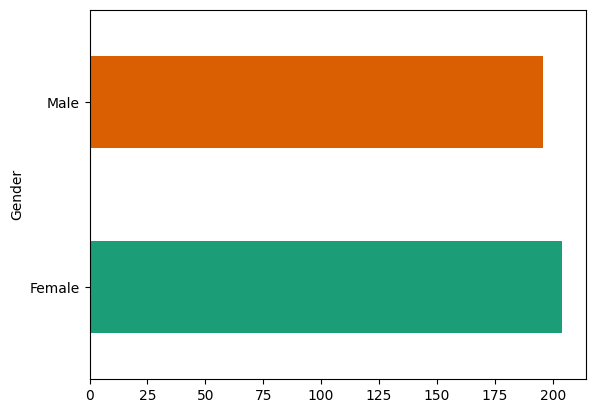

In [ ]:

data.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [ ]:
data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
X=data.iloc[:,2:4].values
Y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.22,random_state=22)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ypred=lr.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90        55
           1       0.89      0.76      0.82        33

    accuracy                           0.88        88
   macro avg       0.88      0.85      0.86        88
weighted avg       0.88      0.88      0.87        88



<Axes: >

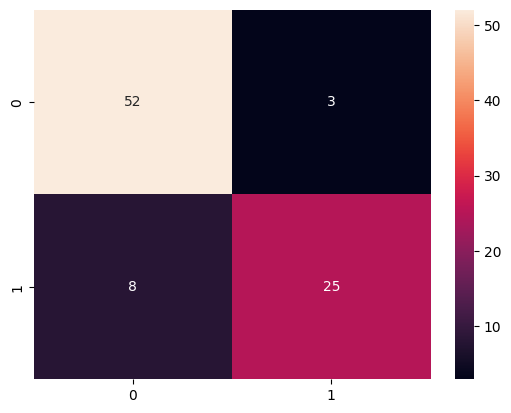

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

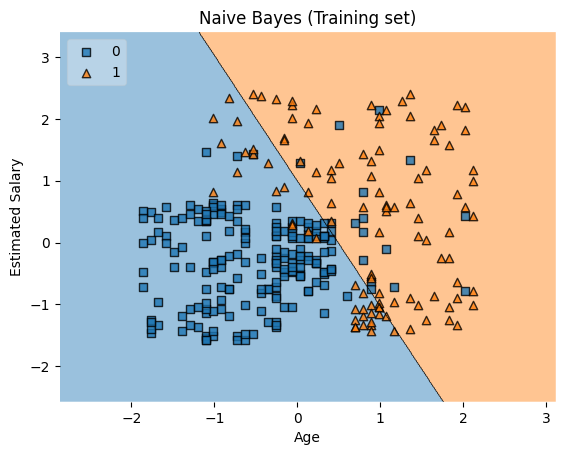

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=xtrain, y=ytrain, clf=lr, legend=2)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()


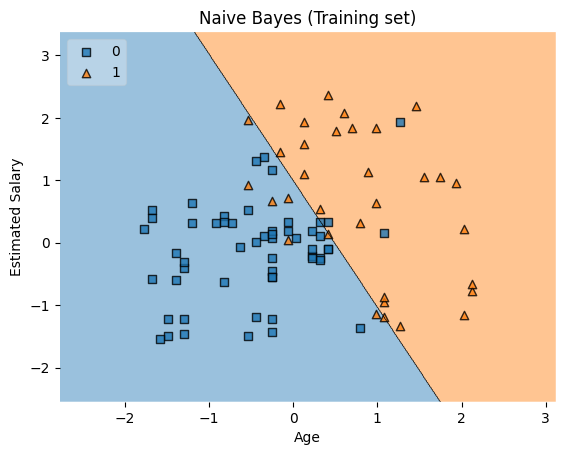

In [ ]:
plot_decision_regions(X=xtest, y=ytest, clf=lr, legend=2)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()